In [2]:
# Import libraries
import numpy as np
import pandas as pd
import fairlens as fl
import matplotlib.pyplot as plt
from itertools import combinations, chain
from sklearn.linear_model import LogisticRegression

# Load in the dataset
df = pd.read_csv("census_adult_income.csv")
df

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,344425,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,131461,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,190350,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,171090,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,23,Private,447488,9th,5,Never-married,Machine-op-inspct,Other-relative,White,Male,0,0,35,Mexico,<=50K
496,27,Private,405855,9th,5,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,<=50K
497,69,Private,108196,9th,5,Never-married,Craft-repair,Other-relative,White,Male,2993,0,40,United-States,<=50K
498,25,Private,170786,9th,5,Never-married,Transport-moving,Other-relative,White,Male,0,0,40,United-States,<=50K


In [3]:
df["race"].value_counts()

 White                 391
 Black                  89
 Other                   8
 Asian-Pac-Islander      7
 Amer-Indian-Eskimo      5
Name: race, dtype: int64

In [4]:
df["native_country"].value_counts()

 United-States                 392
 Mexico                         46
 El-Salvador                    10
 ?                               8
 Dominican-Republic              6
 Portugal                        4
 Guatemala                       4
 Puerto-Rico                     4
 Trinadad&Tobago                 3
 Canada                          3
 Haiti                           3
 Jamaica                         2
 Philippines                     2
 Columbia                        2
 Cuba                            2
 Ireland                         1
 Vietnam                         1
 Poland                          1
 Nicaragua                       1
 India                           1
 Outlying-US(Guam-USVI-etc)      1
 Hong                            1
 Yugoslavia                      1
 China                           1
Name: native_country, dtype: int64

In [5]:
df["income_bracket"].value_counts()

 <=50K    473
 >50K      27
Name: income_bracket, dtype: int64

In [6]:
# Detect sensitive attributes
sensitive_attributes = fl.sensitive.detect_names_df(df, deep_search=True)
print(sensitive_attributes)
print(sensitive_attributes.keys())

df[["sex", "race", "age", "relationship"]].head()

{'age': 'Age', 'marital_status': 'Family Status', 'race': 'Ethnicity', 'sex': 'Gender', 'relationship': 'Family Status'}
dict_keys(['age', 'marital_status', 'race', 'sex', 'relationship'])


,sex,race,age,relationship
0,Female,Black,39,Wife
1,Female,Black,77,Wife
2,Female,Black,38,Wife
3,Female,Black,28,Wife
4,Female,Black,37,Wife


In [8]:
df = df[~df["relationship"].isnull()].reset_index(drop=True)
df = df[~df["education"].isnull()].reset_index(drop=True)
df = df[~df["native_country"].isnull()].reset_index(drop=True)
df = df[~df["income_bracket"].isnull()].reset_index(drop=True)
df = df[~df["age"].isnull()].reset_index(drop=True)
df = df[~df["sex"].isnull()].reset_index(drop=True)
df = df[~df["race"].isnull()].reset_index(drop=True)

In [9]:
df

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,344425,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,131461,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,190350,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,171090,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,23,Private,447488,9th,5,Never-married,Machine-op-inspct,Other-relative,White,Male,0,0,35,Mexico,<=50K
496,27,Private,405855,9th,5,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,<=50K
497,69,Private,108196,9th,5,Never-married,Craft-repair,Other-relative,White,Male,2993,0,40,United-States,<=50K
498,25,Private,170786,9th,5,Never-married,Transport-moving,Other-relative,White,Male,0,0,40,United-States,<=50K


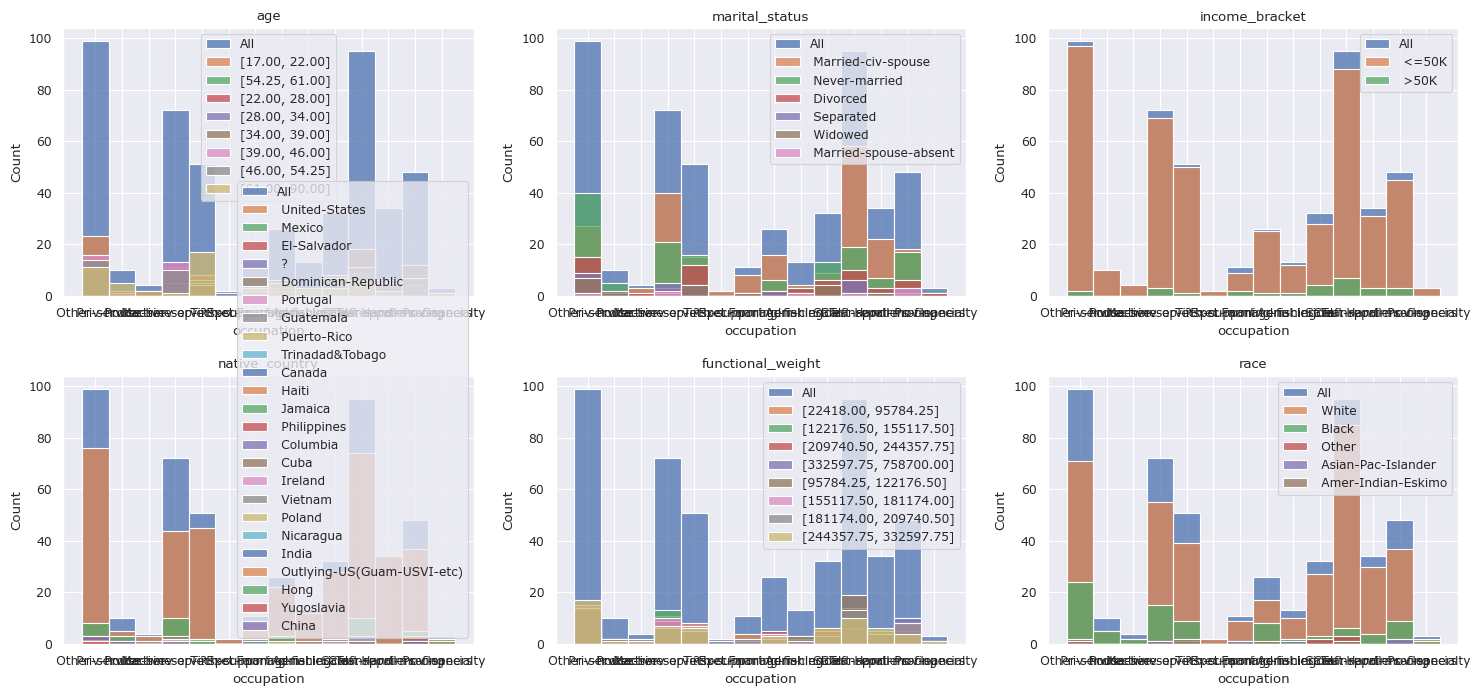

In [10]:
target_attr = "occupation"
sensitive_attrs = ["age", "marital_status", "income_bracket", "native_country", "functional_weight", "race"]

# Set the seaborn style
fl.plot.use_style()

# Plot the distributions
fl.plot.mult_distr_plot(df, target_attr, sensitive_attrs)
plt.show()